# Business Problem

Analyze overall sales trends over time, identifying fluctuations and patterns. Investigate potential causes such as seasonality, market conditions, and marketing initiatives, Break down sales by product categories to find top performers. Identify underperforming categories and explore reasons like changing consumer preferences or quality issues, Evaluate sales across regions to pinpoint strengths and weaknesses. Assess marketing effectiveness and identify areas for improvement based on regional performance, Analyze profitability of products and categories, considering factors like pricing strategy, production costs, and market demand. Conduct cost-benefit analysis to understand overall profitability.

# Objectives

1 Understand overall sales trends and identify factors influencing fluctuations to optimize revenue generation.

2  Determine which product categories are driving sales growth and address underperforming categories to maximize profitability.

3  Gain insights into regional sales performance to optimize marketing strategies and identify opportunities for growth in specific geographic areas.

4  Analyze product profitability to optimize pricing strategies, reduce costs, and enhance overall profitability for sustained business success.


# Hypothesis Testing

Opening new stores in untapped markets will not significantly increase overall sales revenue

Increasing product prices will not lead to a significant decrease in sales volume

Introducing a new product line will not significantly impact overall company profitability

Implementing a customer loyalty program will not result in a significant increase in repeat purchases.

Seasonal variations do not significantly affect sales performance in the retail sector.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import warnings

plt.style.use('ggplot')
pd.set_option('display.max_columns', 24)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_excel(r"C:\Users\lakshya sikri\Desktop\Superstore.xlsx",sheet_name='Orders')
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.0000,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.0000,6.8714


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Data Preprocessing

With a cursory overview, the dataset appears to require minimal data cleaning. However, certain transformations are necessary to prepare the data for analysis. Specifically, redundant columns like Row ID and others deemed irrelevant for this particular analysis will be removed. Additionally, feature engineering will be conducted to enhance the dataset for more insightful analysis.

In [4]:
data=data.drop('Row ID',axis=1)

data=data[[ 
        'Order ID', 
        'Order Date', 
        'Ship Date', 
        'Ship Mode', 
    #'Customer ID',
    #'Customer Name', 
        'Segment', 
    #'Country', 
        'City', 
        'State', 
    #'Postal Code',
        'Region', 
    #'Product ID', 
     'Category', 
        'Sub-Category', 
        'Product Name',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]
data.head(3) # final dataframe, after columns were removed

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.0000,219.5820
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.0000,6.8714


In [5]:
# feature engineering, extracts specific date values from the `Order Date` column, creates new features from existing features
data['month']=data['Order Date'].dt.month 
data['year']=data['Order Date'].dt.year
data['year_month']=data['Order Date'].dt.to_period('M')
data['total_discount_in_dollars']=data['Sales'] * data['Discount'] # discount's equivalent to dollars
data['selling_price']=data['Sales'] / data['Quantity'] # calculates selling price for the each product
data['(net)_profit_before_discount']=data['Sales'] * data['Discount'] + data['Profit'] # net profit before deducting discount
data['order_fulfillment_time']=data['Ship Date'] - data['Order Date'] # interval between order placed and order shipped
data['net_profit_per_unit_sold']=data['Profit'] / data['Quantity'] # net profit generated per unit sold
data=data.rename(columns={'Profit':'net_profit'}) # renames Profit column with net_profit, a more specific name
data['profit_margin']=data['net_profit'] / data['Sales'] * 100 # for a 25% profit margin, the company makes .25 dollars per 1 dollar sale
data['discounted_sales']=data['Sales'] - (data['Discount']*data['Sales']) # extracts sales accounted for discount

In [6]:
print('Output dataframe:')
data.head(5)

Output dataframe:


,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,...,Discount,net_profit,month,year,year_month,total_discount_in_dollars,selling_price,(net)_profit_before_discount,order_fulfillment_time,net_profit_per_unit_sold,profit_margin,discounted_sales
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,...,0.0000,41.9136,11,2013,2013-11,0.0000,130.9800,41.9136,3 days,20.9568,16.0000,261.9600
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,...,0.0000,219.5820,11,2013,2013-11,0.0000,243.9800,219.5820,3 days,73.1940,30.0000,731.9400
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,...,0.0000,6.8714,6,2013,2013-06,0.0000,7.3100,6.8714,4 days,3.4357,47.0000,14.6200
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,...,0.4500,-383.0310,10,2012,2012-10,430.9099,191.5155,47.8789,7 days,-76.6062,-40.0000,526.6676
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,...,0.2000,2.5164,10,2012,2012-10,4.4736,11.1840,6.9900,7 days,1.2582,11.2500,17.8944


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   Order ID                      9994 non-null   object         
 1   Order Date                    9994 non-null   datetime64[ns] 
 2   Ship Date                     9994 non-null   datetime64[ns] 
 3   Ship Mode                     9994 non-null   object         
 4   Segment                       9994 non-null   object         
 5   City                          9994 non-null   object         
 6   State                         9994 non-null   object         
 7   Region                        9994 non-null   object         
 8   Category                      9994 non-null   object         
 9   Sub-Category                  9994 non-null   object         
 10  Product Name                  9994 non-null   object         
 11  Sales            

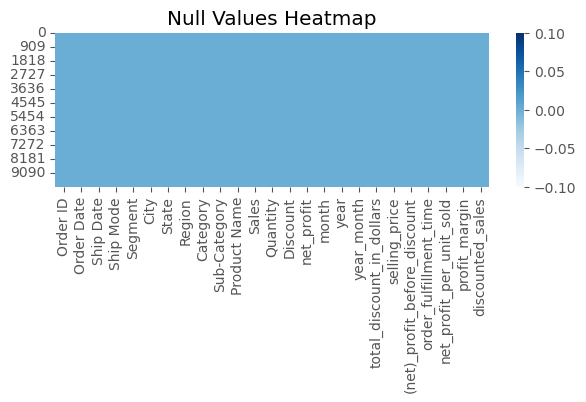

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 2))
plt.title('Null Values Heatmap')
sns.heatmap(data.isnull(), cmap='Blues')  # Setting the colormap to 'Reds' for red tones
plt.show()



With these transformations, the dataset is now primed for analysis. While most real-world datasets necessitate extensive data cleaning and transformations, such as handling missing values, adjusting data types, standardizing or normalizing values, conducting feature engineering, and converting date-time and string types, this dataset only requires minimal adjustments. With these modifications completed, we can proceed to analysis.

# Exploratory Data Analysis

In [19]:
print('The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.')
data.describe()

The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.


,Order Date,Ship Date,Sales,Quantity,Discount,net_profit,month,year,total_discount_in_dollars,selling_price,(net)_profit_before_discount,order_fulfillment_time,net_profit_per_unit_sold,profit_margin,discounted_sales
count,9994,9994,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994,9994.0000,9994.0000,9994.0000
mean,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,229.8580,3.7896,0.1562,28.6569,7.8146,2012.7229,32.2776,60.9196,60.9345,3 days 23:00:46.828096858,7.7994,12.0314,197.5804
min,2011-01-04 00:00:00,2011-01-08 00:00:00,0.4440,1.0000,0.0000,-6599.9780,1.0000,2011.0000,0.0000,0.3360,-3449.9885,0 days 00:00:00,-1319.9956,-275.0000,0.0888
25%,2012-05-23 00:00:00,2012-05-27 00:00:00,17.2800,2.0000,0.0000,1.7288,5.0000,2012.0000,0.0000,5.4700,4.7754,3 days 00:00:00,0.7228,7.5000,14.3360
50%,2013-06-27 00:00:00,2013-06-30 00:00:00,54.4900,3.0000,0.2000,8.6665,9.0000,2013.0000,1.0368,16.2700,14.6352,4 days 00:00:00,2.7670,27.0000,45.9232
75%,2014-05-15 00:00:00,2014-05-19 00:00:00,209.9400,5.0000,0.2000,29.3640,11.0000,2014.0000,14.8704,63.9400,50.3280,5 days 00:00:00,8.7032,36.2500,180.1765
max,2014-12-31 00:00:00,2015-01-06 00:00:00,22638.4800,14.0000,0.8000,8399.9760,12.0000,2014.0000,11319.2400,3773.0800,9508.1616,7 days 00:00:00,1679.9952,50.0000,17499.9500
std,NaN,NaN,623.2451,2.2251,0.2065,234.2601,3.2860,1.1240,164.0256,142.9274,248.7399,1 days 17:55:49.143486104,56.0750,46.6754,539.0453


The dataset encompasses sales data spanning from January 4, 2011, to December 31, 2014. Notably, the earliest recorded shipment date is January 8, 2011, while the latest is January 6, 2015. Upon initial inspection, no evident errors or anomalies are discernible within the Sales, Quantity, and Discount columns. However, it's worth noting that negative values are present in the net_profit, net_profit_before_discount, and net_profit_per_unit_sold columns, indicating potential discrepancies or actual negative profits. Further scrutiny is warranted to ascertain the cause behind these negative values.

# Sales Performance

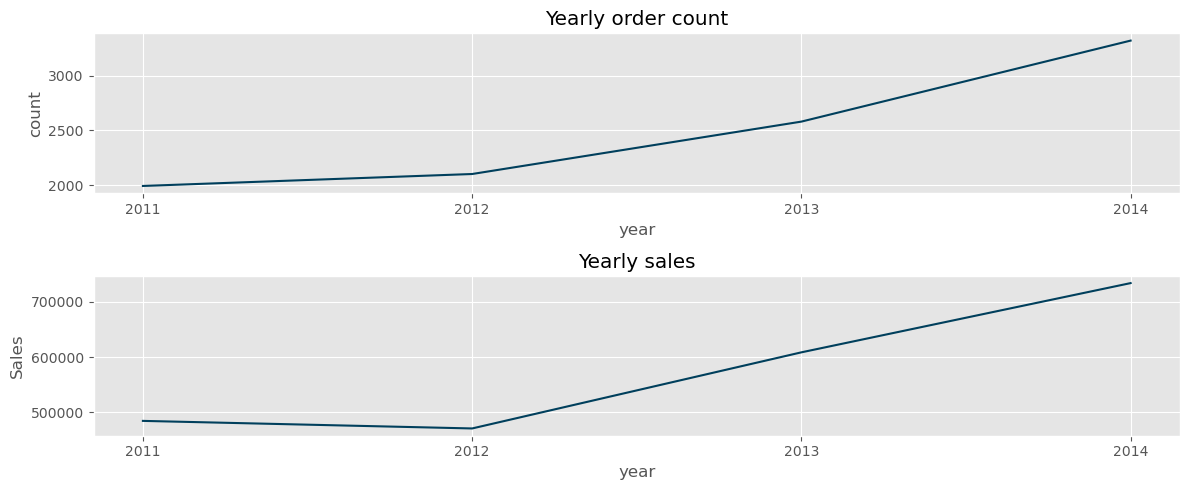

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(211)
data.groupby(['year'])['Order Date'].count().plot(c='#003f5c')
plt.ylabel('count')
plt.xticks(data.groupby(['year'])['Order Date'].count().index)
plt.title('Yearly order count')

plt.subplot(212)
data.groupby('year')['Sales'].sum().plot(c='#003f5c')
plt.ylabel('Sales')
plt.xticks(data.groupby('year')['Sales'].sum().index)
plt.title('Yearly sales')

plt.tight_layout()
plt.show()

In [21]:
print('Annual total sales: ')
data.groupby('year')['Sales'].sum()

Annual total sales: 


year
2011   484247.4981
2012   470532.5090
2013   608473.8300
2014   733947.0232
Name: Sales, dtype: float64

Over the years, there has been a consistent increase in both orders and sales. However, a minor downturn in sales is noticeable in 2012. Despite a total sales figure of $484,247 in 2011, Superstore    sales    experienced    a   slight    decline to $470,532 in the subsequent year, representing a 2.83% difference equivalent to $13,715.

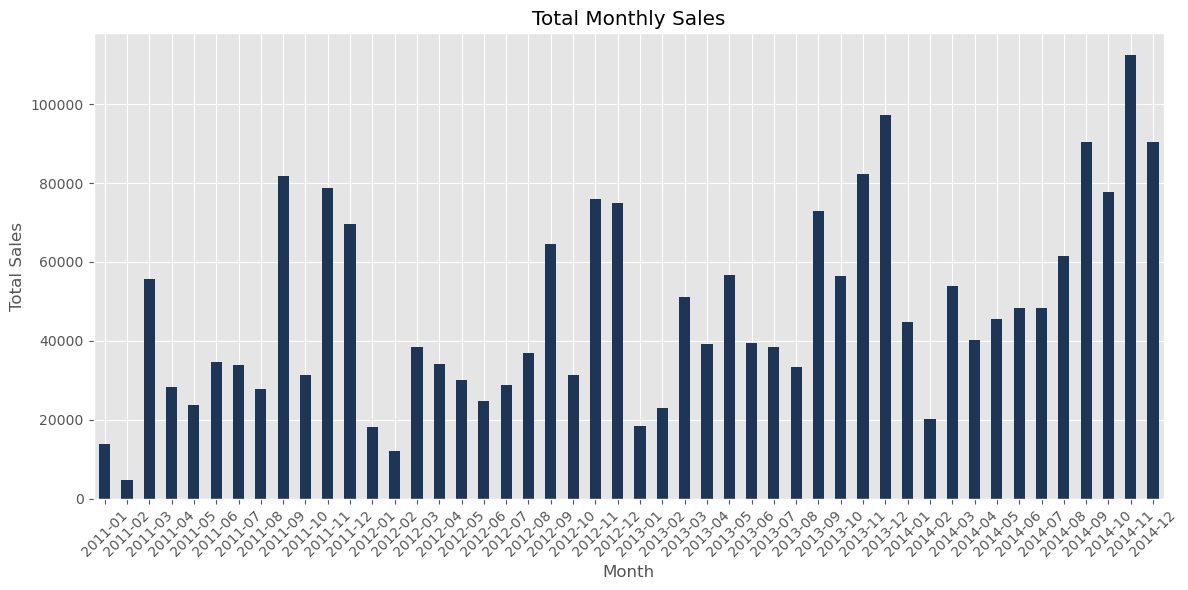

In [18]:
data.groupby('year_month')['Sales'].sum().plot(kind='bar', color='#1d3557', figsize=(12, 6))
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Seasonal trends are apparent in Superstore sales data. Sales typically rise towards the end of the year, starting in November and peaking in December, before declining in January. Following this dip, sales tend to increase again between February and March each year. From April to August, a relatively stable trend is observed annually. However, a notable decline occurs during October.

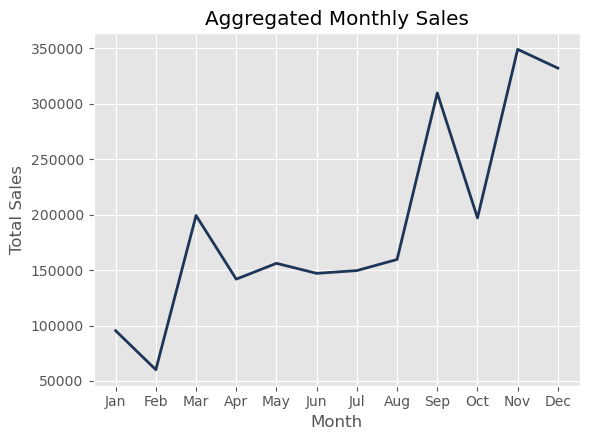

In [24]:
data.groupby('month')['Sales'].sum().plot(kind='line', color='#1d3557', figsize=(6, 4.5), linewidth=2)
plt.title('Aggregated Monthly Sales')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


The visualization illustrates total sales for each month over a span of 4 years. Sales peak during holiday seasons, indicating higher consumer spending during these periods. Additionally, a notable increase in sales is observed in September, coinciding with the start of the academic year in America. This surge in September sales can likely be attributed to heightened demand for school-related products such as binders, home and office supplies, papers, bookcases, and accessories, among others.







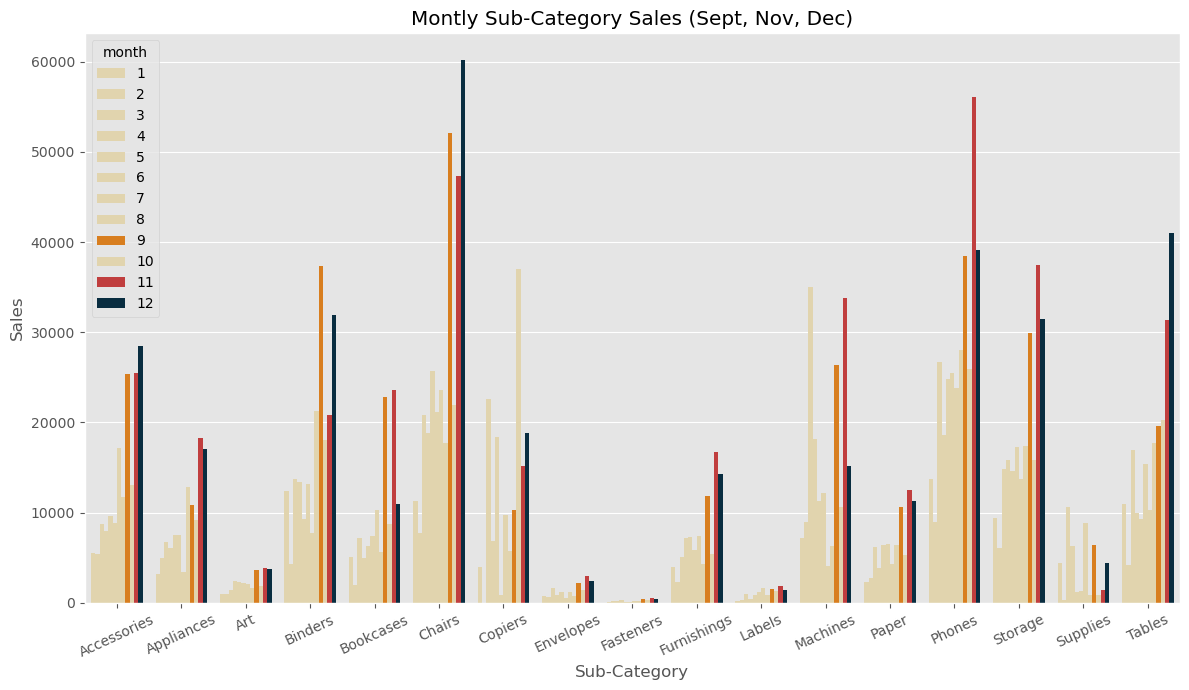

In [8]:
# Convert 'month' column to strings
month_subcat['month'] = month_subcat['month'].astype(str)

# Plotting
plt.figure(figsize=(12,7))
sns.barplot(data=month_subcat, x='Sub-Category', y='Sales', hue='month',
            palette=['#e9d8a6','#e9d8a6','#e9d8a6','#e9d8a6','#e9d8a6','#e9d8a6',
                     '#e9d8a6','#e9d8a6','#f77f00','#e9d8a6','#d62828','#003049'])
plt.title('Montly Sub-Category Sales (Sept, Nov, Dec)')
plt.xticks(rotation=25)
plt.tight_layout()





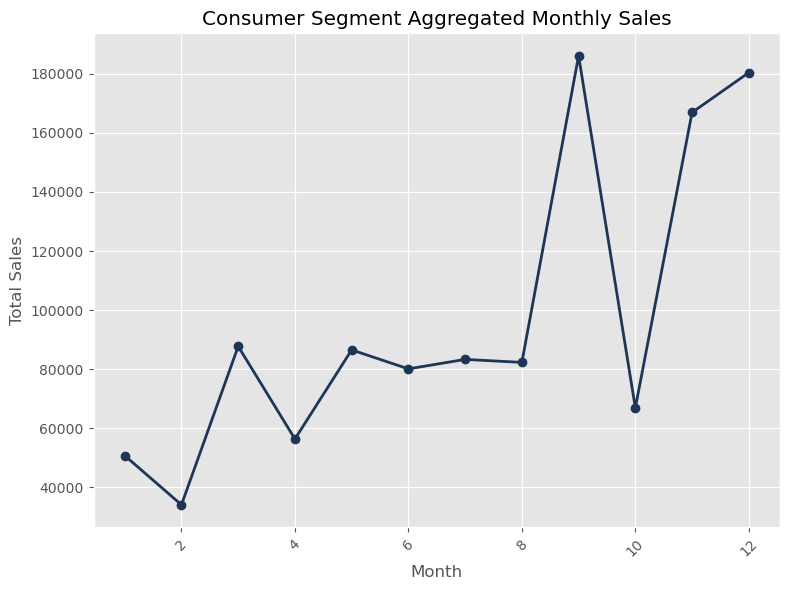

In [37]:
data.query('Segment == "Consumer"').groupby('month')['Sales'].sum().plot(kind='line', figsize=(8, 6), color='#1d3557', marker='o', linewidth=2)
plt.title('Consumer Segment Aggregated Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Under consumer segment, sales in September, November, and December are higher than the rest of the year. This supports the possibility that increased sales in September may be due to the reopening of classes (sales of school-related products also increased).

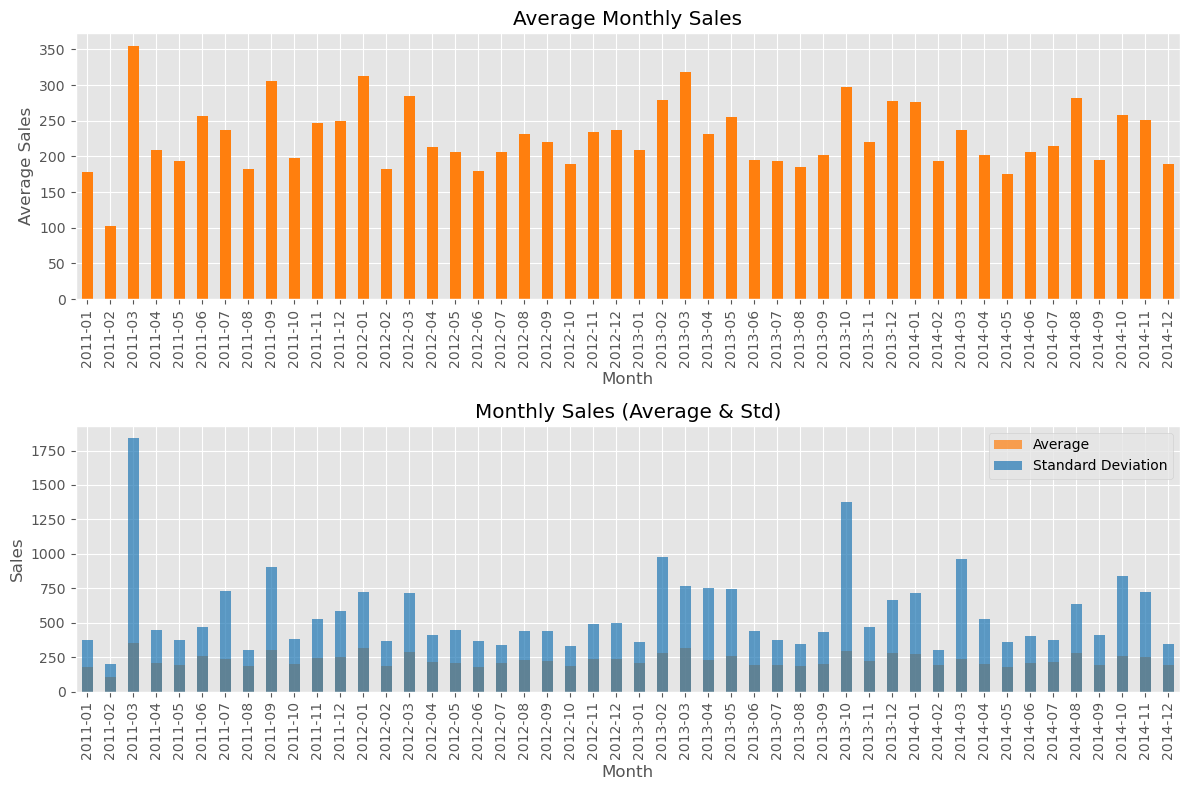

In [41]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
data.groupby('year_month')['Sales'].mean().plot(kind='bar', color='#ff7f0e')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')

plt.subplot(212)
data.groupby('year_month')['Sales'].mean().plot(kind='bar', color='#ff7f0e', alpha=0.7)
data.groupby('year_month')['Sales'].describe()['std'].plot(kind='bar', color='#1f77b4', alpha=0.7)
plt.title('Monthly Sales (Average & Std)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(['Average', 'Standard Deviation'])

plt.tight_layout()
plt.show()




The analysis reveals a significant variation in sales within each month throughout the period, as indicated by the standard deviation of monthly sales. Notably, this variability appears to follow a discernible pattern, with higher variability observed during March, September, and October. Interestingly, from April 2012 until the end of the year, sales variability seems to have decreased. This period coincides with a slight downward trend in overall sales observed in the total yearly sales graph, indicating lower sales figures from 2011 to 2012. Conversely, sales variability was higher in 2011, 2013, and 2014.

Store sales are inherently subject to fluctuations due to various factors such as seasonality, customer behaviors, and competitive landscape, among others. Understanding and analyzing these fluctuations can provide valuable insights for strategic decision-making and operational management.







# Product Categories

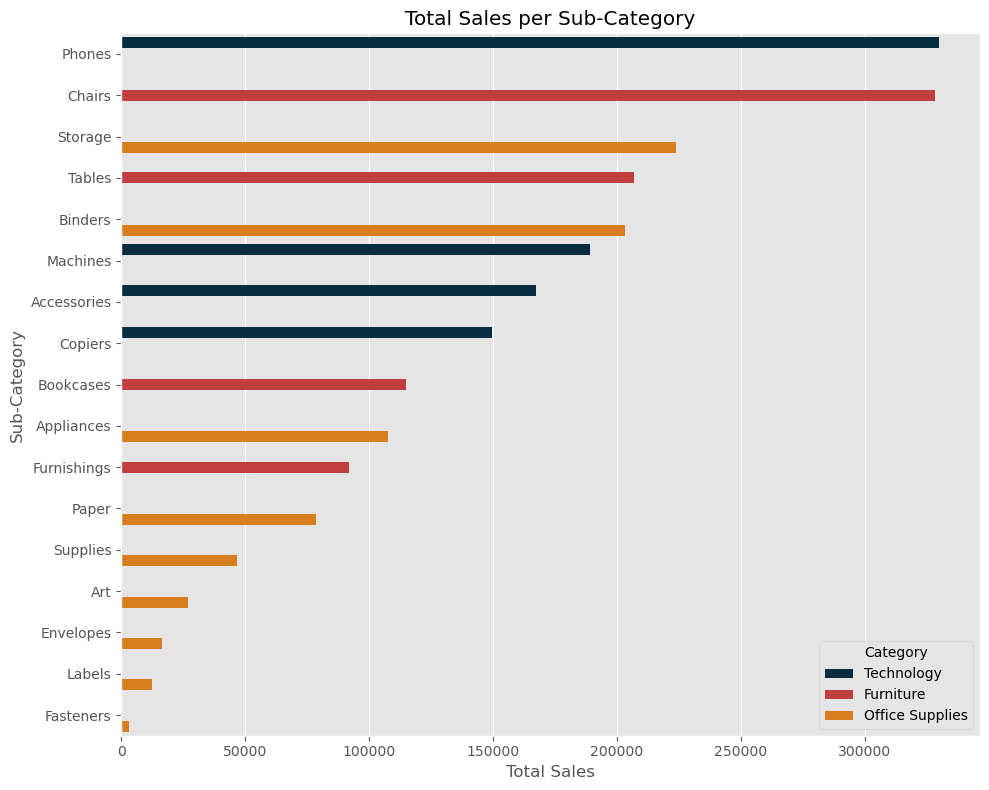

In [46]:
df_sales = pd.DataFrame(data.groupby(['Category','Sub-Category'])['Sales'].sum()).reset_index().sort_values('Sales', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Sales', y='Sub-Category', data=df_sales, hue='Category', palette=['#003049','#d62828','#f77f00'])
plt.title('Total Sales per Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


The visualization provides a comprehensive overview of the sales magnitude for each product sub-category. Notably, within the technology category, phones emerge as the top sales-generating products, followed by chairs in the furniture category, and storage products in the office supplies category. Over the 4-year period from 2011 to 2014, phones, chairs, and storage products consistently maintain their positions as the top three sales-generating products. Additionally, tables, binders, and machine products also contribute significantly to overall sales.

Conversely, copier products under the technology category exhibit the lowest performance. In the furniture and office supplies categories, furnishings and fasteners are identified as the least performing sub-categories.

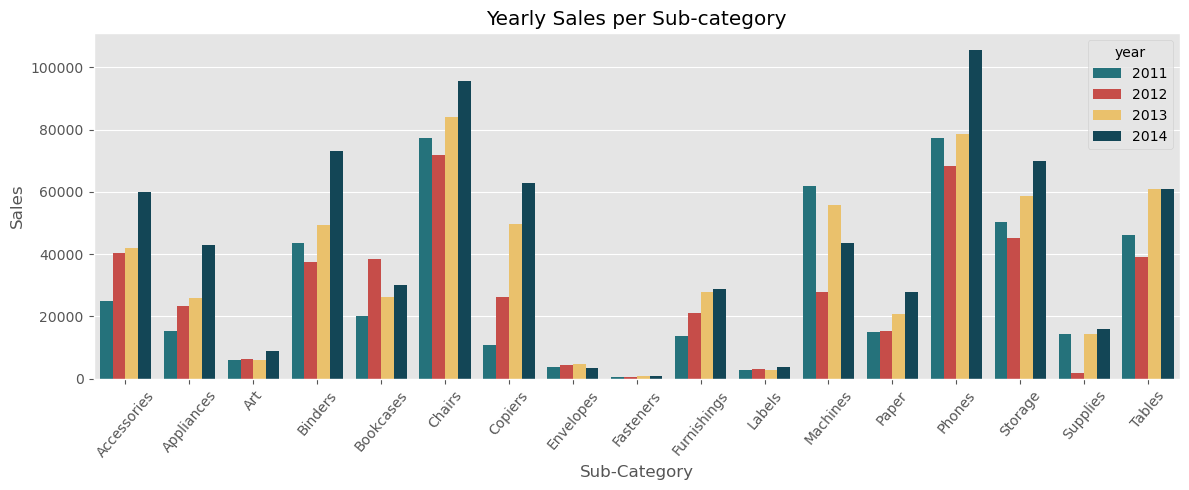

In [10]:
# Create yearly_sales DataFrame
yearly_sales = pd.DataFrame(data.groupby(['Sub-Category', 'year'])['Sales'].sum()).reset_index()

# Convert 'year' column to strings
yearly_sales['year'] = yearly_sales['year'].astype(str)

# Plotting
plt.figure(figsize=(12,5))
sns.barplot(data=yearly_sales, x='Sub-Category', y='Sales', hue='year', palette=['#177e89', '#db3a34', '#ffc857', '#084c61'])
plt.xticks(rotation=50)
plt.title('Yearly Sales per Sub-category')
plt.tight_layout()
plt.show()

In [52]:
yearly_sales['yearly_growth_rate'] = yearly_sales.groupby('Sub-Category')['Sales'].pct_change() * 100
print('Sales Annual Average Growth Rate:')
pd.DataFrame(yearly_sales.groupby('Sub-Category')['yearly_growth_rate'].mean().sort_values(ascending=False))

Sales Annual Average Growth Rate:


,yearly_growth_rate
Sub-Category,
Supplies,185.7423
Copiers,85.8547
Appliances,42.8799
Accessories,36.1576
Furnishings,29.4793
Bookcases,24.9344
Paper,24.1187
Binders,21.9130
Art,16.1833


Based on the average annual growth rate of sales, envelope products exhibited the slowest growth, while supplies products experienced the fastest growth at 185% average annual growth rate (AAGR). Following closely are copier and appliances products, with AAGRs of 86% and 43%, respectively.

# Geographic Insights

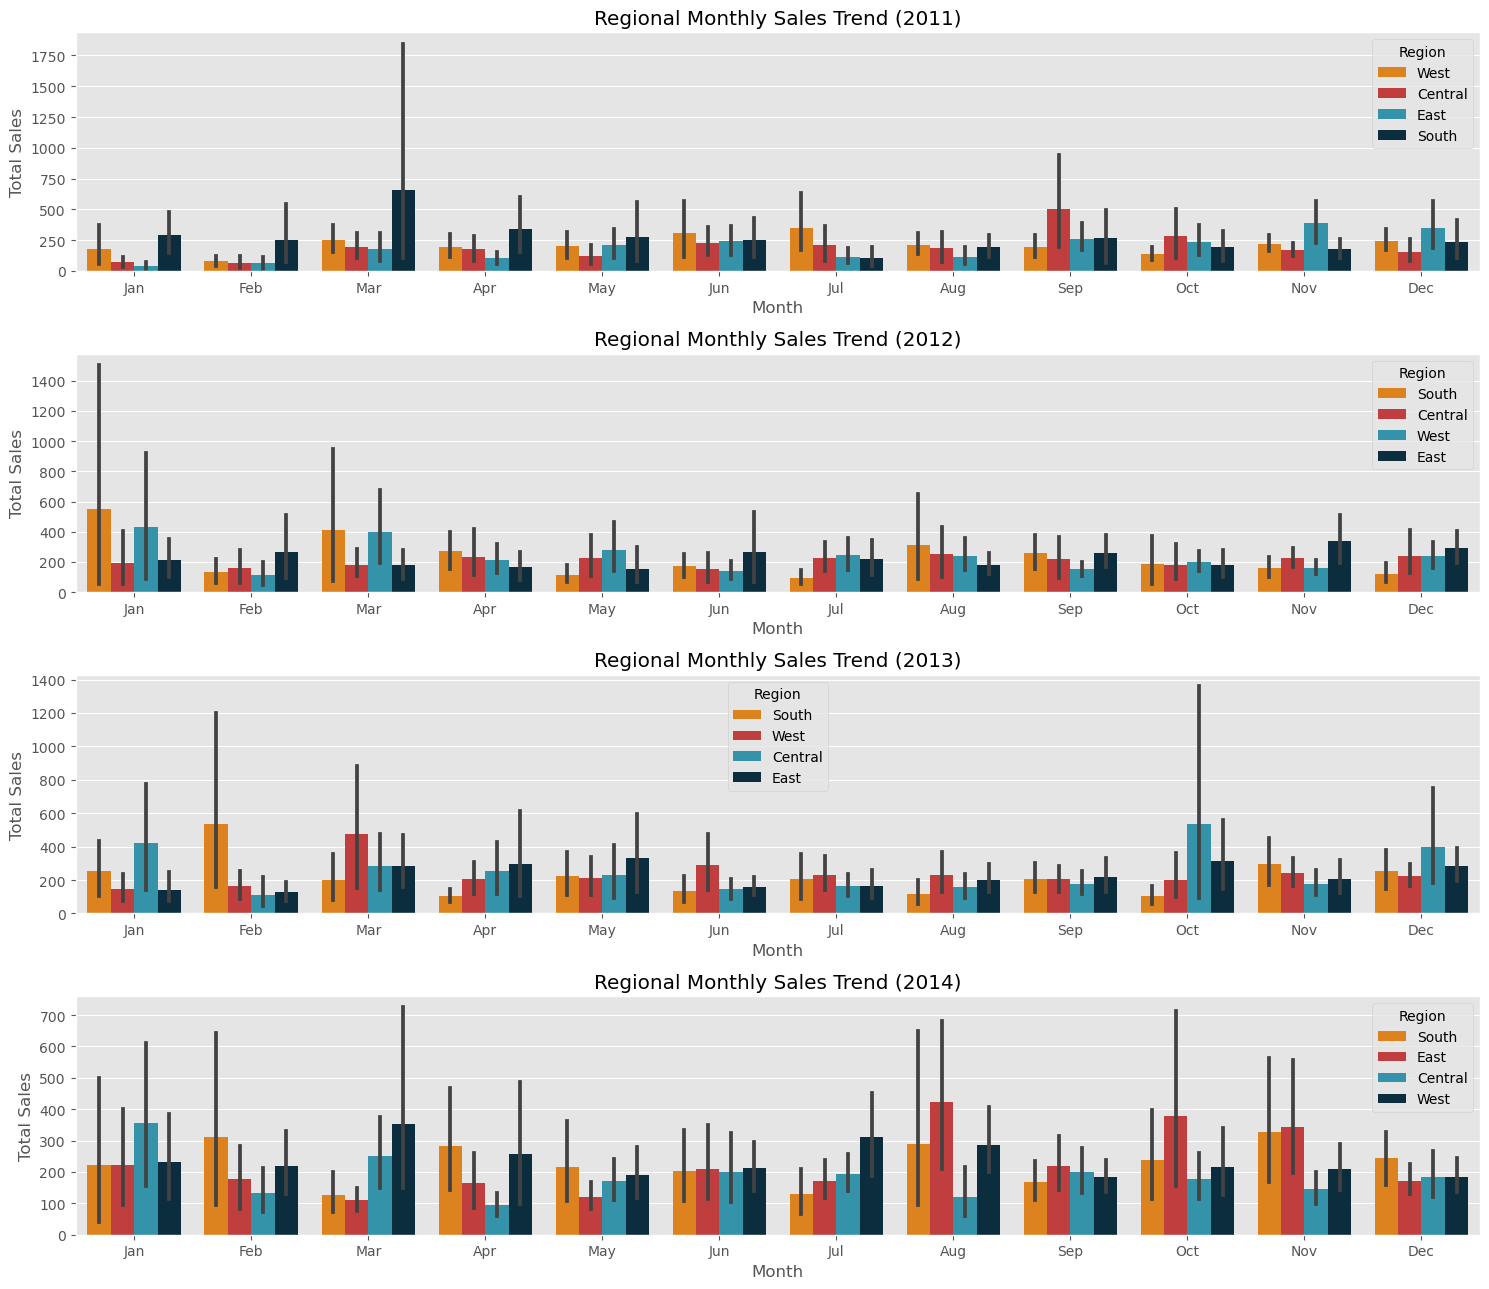

In [54]:
plt.figure(figsize=(15, 13))

plt.subplot(411)
sns.barplot(data=data11, x='month', y='Sales', hue='Region', palette=['#fb8500', '#d62828', '#219ebc', '#023047'])
plt.title('Regional Monthly Sales Trend (2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Region')

plt.subplot(412)
sns.barplot(data=data12, x='month', y='Sales', hue='Region', palette=['#fb8500', '#d62828', '#219ebc', '#023047'])
plt.title('Regional Monthly Sales Trend (2012)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Region')

plt.subplot(413)
sns.barplot(data=data13, x='month', y='Sales', hue='Region', palette=['#fb8500', '#d62828', '#219ebc', '#023047'])
plt.title('Regional Monthly Sales Trend (2013)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Region')

plt.subplot(414)
sns.barplot(data=data14, x='month', y='Sales', hue='Region', palette=['#fb8500', '#d62828', '#219ebc', '#023047'])
plt.title('Regional Monthly Sales Trend (2014)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Region')

plt.tight_layout()
plt.show()


As observed previously, seasonal trends are evident in regional sales data per year, with sales typically increasing during holiday seasons (November and December), the opening of classes (September), and potentially during Easter (March). Similarly, total sales have consistently been higher throughout most of the year in the West region, followed closely by the East region compared to the remaining two regions. Conversely, sales in the South region have been lower each year compared to other regions, with the exception of March 2011 when sales in the South were more than three times higher than the next best performer.

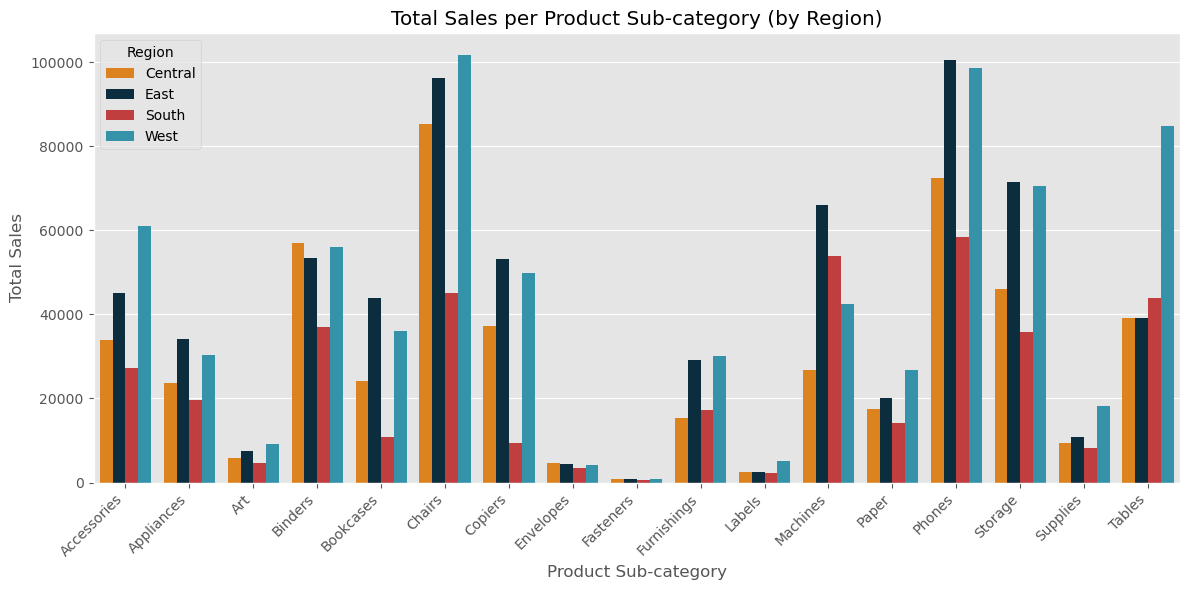

In [56]:
reg_sub=pd.DataFrame(data.groupby(['Region','Sub-Category'])['Sales'].sum()).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=reg_sub, x='Sub-Category', y='Sales', hue='Region',palette=['#fb8500','#023047','#d62828','#219ebc'])
plt.xlabel('Product Sub-category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Sub-category (by Region)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

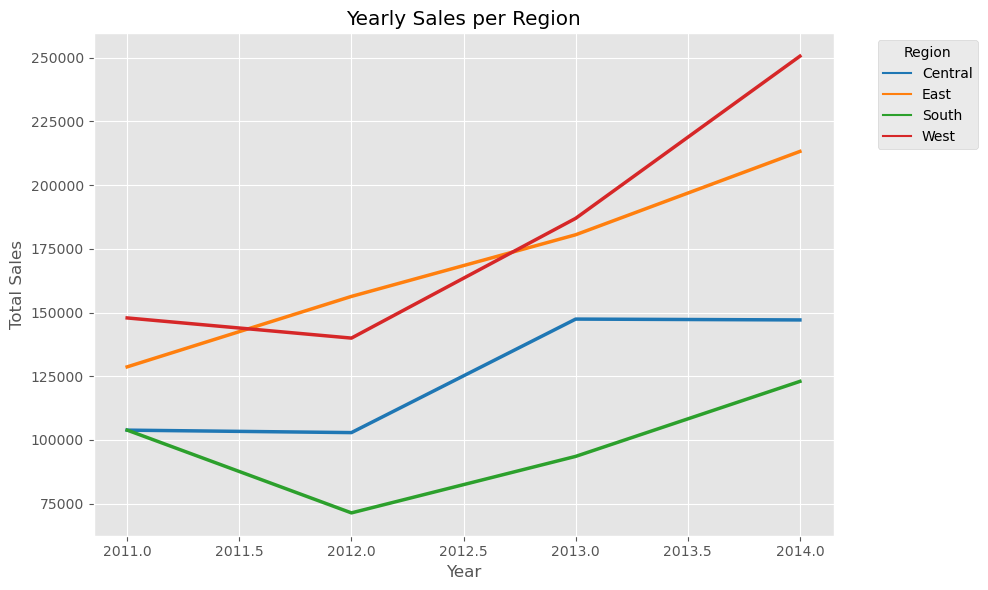

In [12]:
# Create year_s DataFrame
year_s = pd.DataFrame(data.groupby(['Region', 'year'])['Sales'].sum()).reset_index()

# Replace inf values with NaN
year_s.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_s, x='year', y='Sales', hue='Region', palette='tab10', linewidth=2.5)
plt.title('Yearly Sales per Region')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The visualization illustrates how sales for each region evolved over time. In the Central region, a notable surge in sales occurred from 2013 onward, indicating sharp positive growth. Conversely, the East region demonstrated consistent yearly positive growth.

For the South region, a temporary decline in sales was evident in 2012, but the region subsequently rebounded. Similarly, the West region experienced a brief period of negative growth in 2012 before rebounding and sustaining positive growth thereafter.

The slight dip in total sales observed in 2012 can be attributed primarily to the South region, followed by the West region, with the Central region also experiencing a minor contribution to the dip. Interestingly, despite the overall dip, the East region continued to exhibit positive growth in 2012.

In [65]:
year_s['yearly_growth_rate']=year_s.groupby('Region')['Sales'].pct_change() * 100

print('Sales Average Annual Growth Rate (AAGR, 2011-2014) :')
pd.DataFrame(year_s.groupby('Region')['yearly_growth_rate'].mean())

Sales Average Annual Growth Rate (AAGR, 2011-2014) :


,yearly_growth_rate
Region,
Central,14.0524
East,18.3619
South,10.4230
West,20.7595


# Profitability

In [66]:
yearly_summary = data.groupby('year')[['Sales','net_profit']].sum()

yearly_summary['profit_margin'] = (yearly_summary['net_profit'] / yearly_summary['Sales']) * 100
yearly_summary

,Sales,net_profit,profit_margin
year,,,
2011,484247.4981,49543.9741,10.2311
2012,470532.5090,61618.6037,13.0955
2013,608473.8300,81726.9308,13.4315
2014,733947.0232,93507.5131,12.7404


In [67]:
profit_margin_df=pd.DataFrame(data.groupby(['Category','Sub-Category'])['profit_margin'].mean()).reset_index()
print("This table shows exact values on the average profit margin of each product sub-category:")
profit_margin_df

This table shows exact values on the average profit margin of each product sub-category:


,Category,Sub-Category,profit_margin
0,Furniture,Bookcases,-12.6640
1,Furniture,Chairs,4.3900
2,Furniture,Furnishings,13.7066
3,Furniture,Tables,-14.7727
4,Office Supplies,Appliances,-15.6869
5,Office Supplies,Art,25.1646
6,Office Supplies,Binders,-19.9595
7,Office Supplies,Envelopes,42.3140
8,Office Supplies,Fasteners,29.9171
9,Office Supplies,Labels,42.9663


Utilizing profit margin as a metric, the company demonstrated fluctuating performance over the analyzed period. In 2011, the company generated the least profit margin at 10.2311%. However, in the subsequent year, 2012, profit margin improved to 13.0955%. This positive trend continued into 2013, with the company achieving a higher profit margin of 13.4315%. However, the momentum slowed in the following year, 2014, with the company recording a lower profit margin of 12.7404%, even below the 2012 level.

While profit margin provides valuable insights into financial performance, it's essential to consider other metrics such as cost of goods sold (COGS), shareholder's equity, and operating income for a comprehensive understanding. However, since the dataset primarily contains sales data, the analysis focuses on profit margin as a key indicator of financial performance.

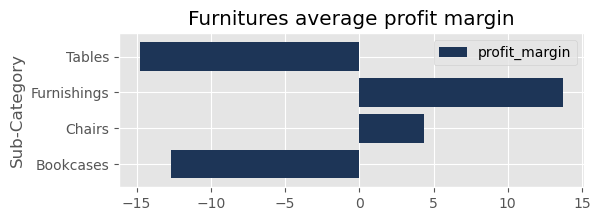

In [70]:
barr1=profit_margin_df[profit_margin_df['Category']==\
                      'Furniture'][['Sub-Category',\
                                    'profit_margin']].set_index('Sub-Category')

barr1.plot(kind='barh',\
           title='Furnitures average profit margin',\
           color='#1d3557',\
           figsize=(6,2),\
           width=.8)

plt.show()

For furnitures products, furnishings products, on average, are the most profitable followed by chairs products. On the other hand, the company was operating at a loss on tables and bookcases products. Assuming similar sales, loss on tables are higher than gains on furnishings.



<Figure size 800x600 with 0 Axes>

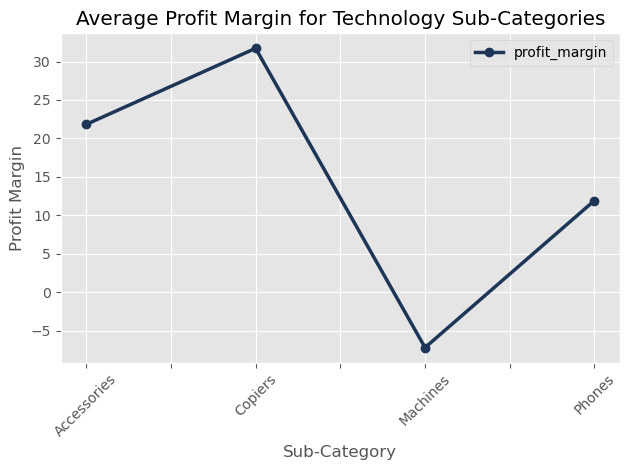

In [72]:
plt.figure(figsize=(8, 6))
barr3.plot(color='#1d3557', marker='o', linewidth=2.5)
plt.title('Average Profit Margin for Technology Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


On technology products, the company, on average, was profiting more compared to furniture ones. Three of its product sub-categories were generating profit at much higher margin profit: 12% for phones, 22% for tech accesories, and 32% profit margin for copiers products. The company, on the other hand, achines products, was operating at a loss with machine products.

<Figure size 1000x600 with 0 Axes>

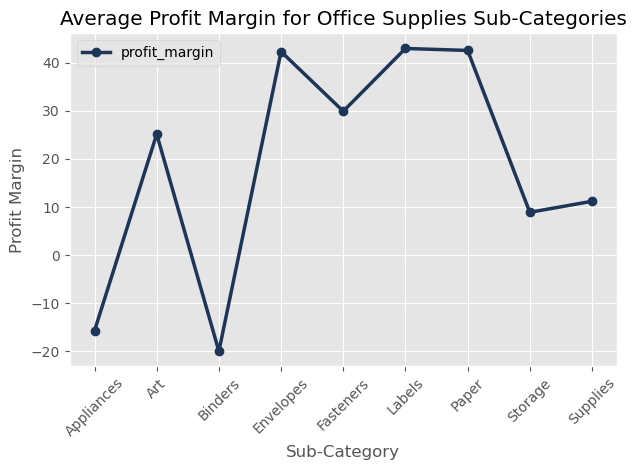

In [74]:
plt.figure(figsize=(10, 6))

barr2.plot(marker='o', color='#1d3557', linewidth=2.5)
plt.title('Average Profit Margin for Office Supplies Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Not only do five product sub-categories under office supplies had over 20% profit margin, three of which had over 40% discount, two of the remaining four sub-categories had also positive profit margin of 9% and 11%. The company, on the other hand, were operating at a loss on the remaining two: binders and appliences products during the 4 year period.

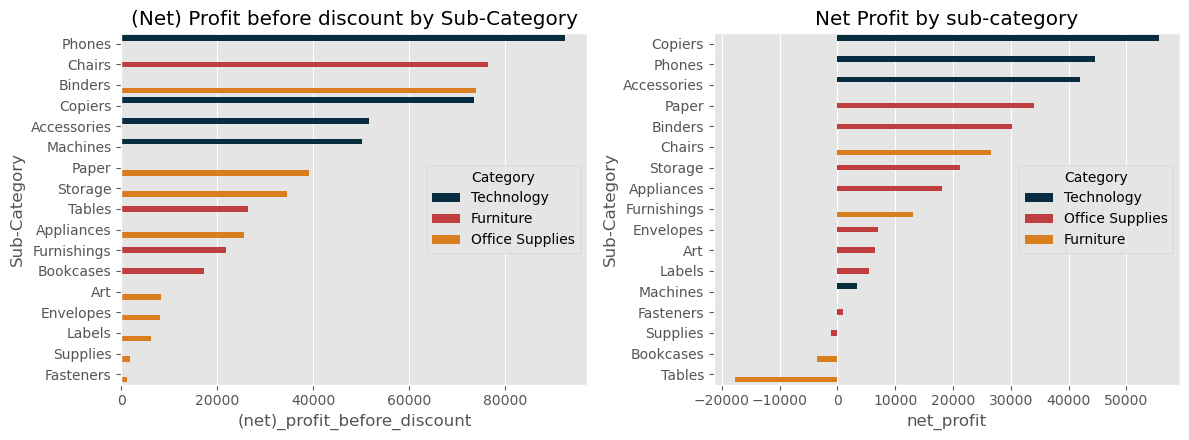

In [76]:
df_profit=pd.DataFrame(data.groupby(['Category','Sub-Category'])['(net)_profit_before_discount'].sum()).reset_index().sort_values('(net)_profit_before_discount',ascending=False)

plt.figure(figsize=(12,4.5))

plt.subplot(121)
sns.barplot(x='(net)_profit_before_discount',y='Sub-Category',data=df_profit,hue='Category',palette=['#003049','#d62828','#f77f00'])
plt.title('(Net) Profit before discount by Sub-Category')

plt.subplot(122)
df_profit2=pd.DataFrame(data.groupby(['Category','Sub-Category'])['net_profit'].sum()).reset_index().sort_values('net_profit',ascending=False)
sns.barplot(x='net_profit',y='Sub-Category',data=df_profit2,hue='Category',palette=['#003049','#d62828','#f77f00'])
plt.title('Net Profit by sub-category')

plt.tight_layout()
plt.show()

In [77]:
df_profit_beforeNafter=pd.merge(df_profit,df_profit2, on='Sub-Category',how='inner').drop('Category_y',axis=1)
df_profit_beforeNafter['percentage_drop']=df_profit_beforeNafter['net_profit'] / df_profit_beforeNafter['(net)_profit_before_discount'] *100 - 100
df_profit_beforeNafter=df_profit_beforeNafter.sort_values(by='percentage_drop',ascending=True)

print('This table shows how discounts applied to products during the 4-year period, affected (net) profit before discount: ')
df_profit_beforeNafter.sort_values('net_profit',ascending=False)

This table shows how discounts applied to products during the 4-year period, affected (net) profit before discount: 


,Category_x,Sub-Category,(net)_profit_before_discount,net_profit,percentage_drop
3,Technology,Copiers,73617.5553,55617.8249,-24.4503
0,Technology,Phones,92608.6698,44515.7306,-51.9314
4,Technology,Accessories,51738.6373,41936.6357,-18.9452
6,Office Supplies,Paper,39117.8365,34053.5693,-12.9462
2,Office Supplies,Binders,73966.8426,30221.7633,-59.1415
1,Furniture,Chairs,76404.9664,26590.1663,-65.1984
7,Office Supplies,Storage,34476.7960,21278.8264,-38.2807
9,Office Supplies,Appliances,25628.3051,18138.0054,-29.2267
10,Furniture,Furnishings,21768.0964,13059.1436,-40.0079
13,Office Supplies,Envelopes,8138.1671,6964.1767,-14.4257


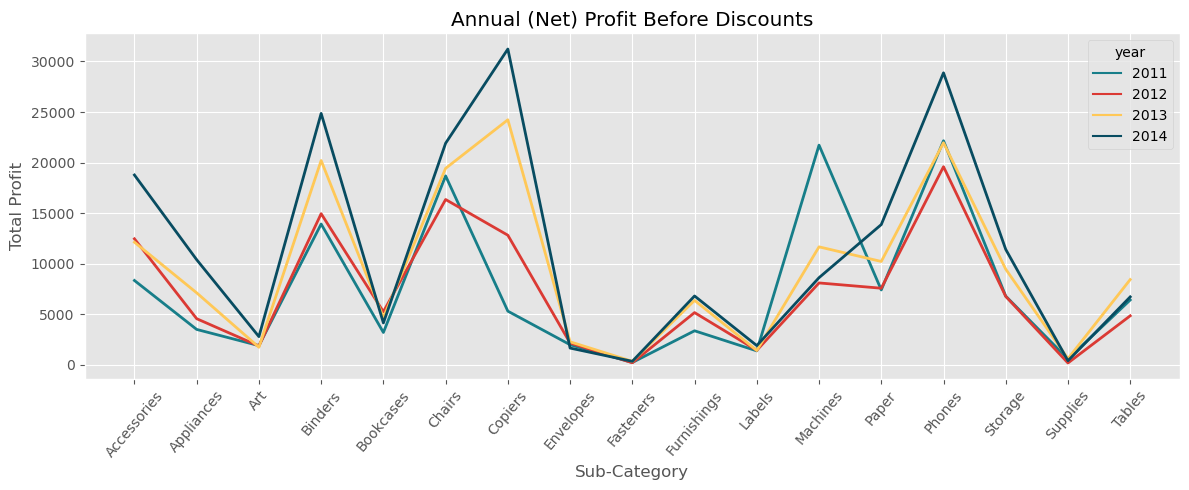

In [14]:
# Create total_1 DataFrame
total_1 = pd.DataFrame(data.groupby(['Sub-Category', 'year'])[['(net)_profit_before_discount']].sum().reset_index())

# Replace inf values with NaN
total_1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plotting
plt.figure(figsize=(12, 5))
sns.lineplot(data=total_1, x='Sub-Category', y='(net)_profit_before_discount', hue='year', palette=['#177e89', '#db3a34', '#ffc857', '#084c61'], linewidth=2)
plt.xticks(rotation=50, ha='center')
plt.title('Annual (Net) Profit Before Discounts')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

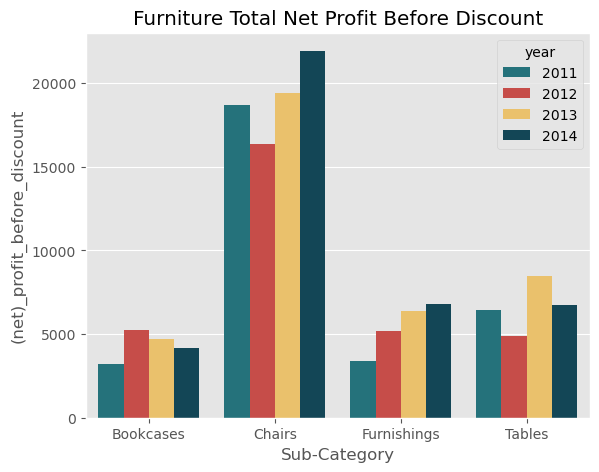

In [15]:

# Create total_profit_b4_dis DataFrame
total_profit_b4_dis = pd.DataFrame(data.groupby(['Category', 'Sub-Category', 'year'])['(net)_profit_before_discount'].sum()).reset_index()

# Convert 'year' column to strings
total_profit_b4_dis['year'] = total_profit_b4_dis['year'].astype(str)

# Plotting
plt.figure(figsize=(6.5,5))
furniture = total_profit_b4_dis[total_profit_b4_dis['Category'] == 'Furniture']
sns.barplot(data=furniture, x='Sub-Category', y='(net)_profit_before_discount', hue='year', palette=['#177e89', '#db3a34', '#ffc857', '#084c61'])
plt.title('Furniture Total Net Profit Before Discount')
plt.show()

The total profit generated by chairs products over the four-year period significantly surpassed all other furniture products. Additionally, there was consistent profit growth for furnishings, while a downward trend was observed for bookcases after 2012.

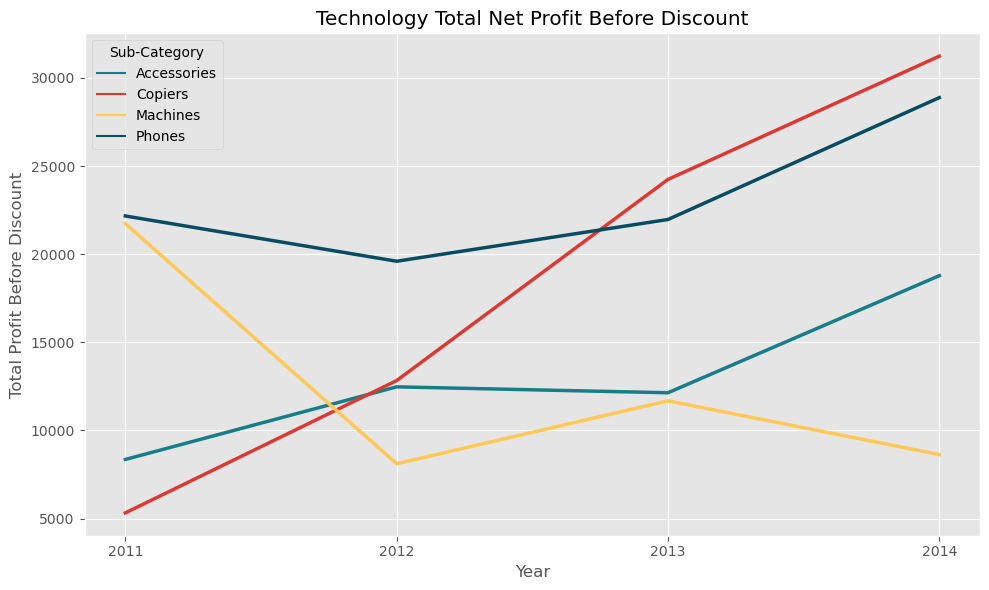

In [16]:
# Replace inf values with NaN
total_profit_b4_dis.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
technology = total_profit_b4_dis[total_profit_b4_dis['Category'] == 'Technology']
sns.lineplot(data=technology, x='year', y='(net)_profit_before_discount', hue='Sub-Category', palette=['#177e89', '#db3a34', '#ffc857', '#084c61'], linewidth=2.5)
plt.title('Technology Total Net Profit Before Discount')
plt.xlabel('Year')
plt.ylabel('Total Profit Before Discount')
plt.tight_layout()
plt.show()

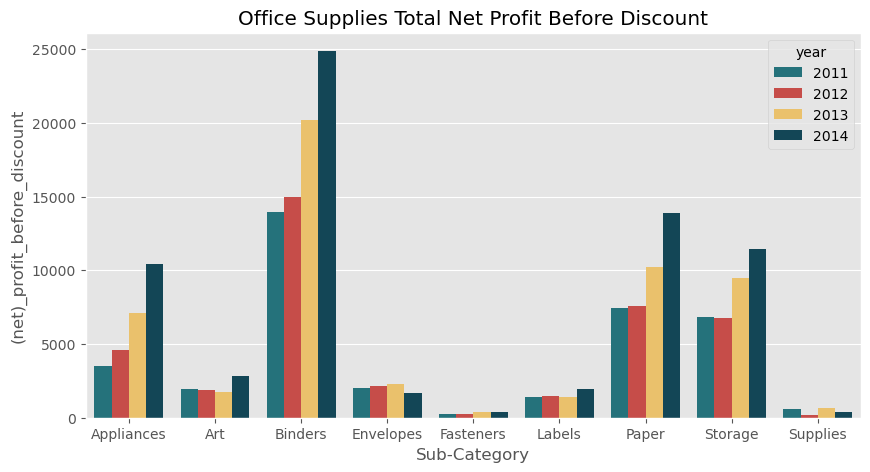

In [17]:
# Convert 'year' column to strings
total_profit_b4_dis['year'] = total_profit_b4_dis['year'].astype(str)

# Plotting
plt.figure(figsize=(10,5))
office_supplies = total_profit_b4_dis[total_profit_b4_dis['Category'] == 'Office Supplies']
sns.barplot(data=office_supplies, x='Sub-Category', y='(net)_profit_before_discount', hue='year', palette=['#177e89', '#db3a34', '#ffc857', '#084c61'])
plt.title('Office Supplies Total Net Profit Before Discount')
plt.show()

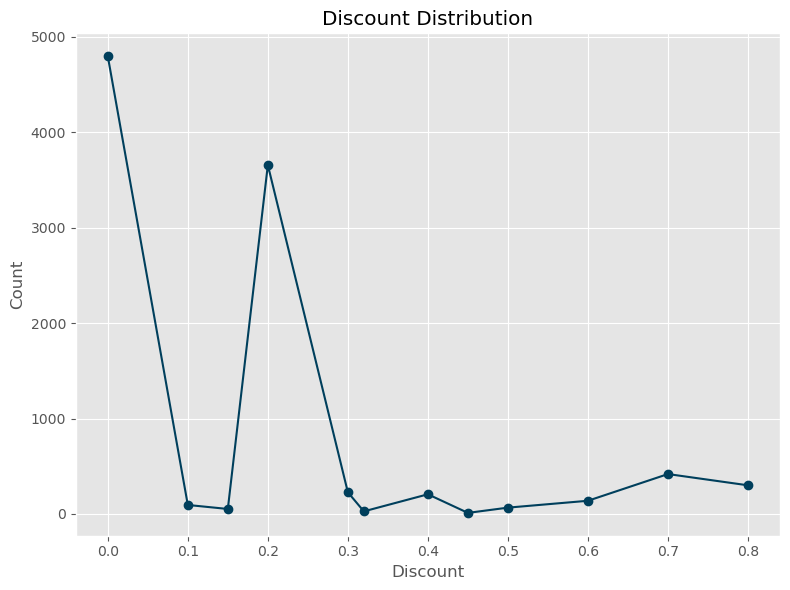

In [82]:
discount_counts = data['Discount'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.plot(discount_counts.index, discount_counts.values, marker='o', color='#003f5c', linestyle='-')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


With the available data, discounts appear to play a significant role in the company's profit over the four-year period. The histogram reveals that the majority of orders either had no discount or were offered a 20% discount. However, there is a notable number of orders, approximately 400 or fewer, that received discounts of 60%, 70%, or 80%. It is plausible that these highly discounted products experienced high sales and were priced at the higher end of the spectrum, but further investigation is required to confirm this assumption.

In [83]:
print('Summary statistics on orders that had no discount (0%):')
data[data['Discount'] == 0][['Sales',\
                             'selling_price',\
                             '(net)_profit_before_discount']].agg(['mean','median','sum','std','count'])

Summary statistics on orders that had no discount (0%):


,Sales,selling_price,(net)_profit_before_discount
mean,226.7421,58.9050,66.9003
median,53.5500,15.9850,15.9952
sum,1087908.4700,282626.3900,320987.6032
std,650.3189,150.3307,257.0554
count,4798.0000,4798.0000,4798.0000


Comparing it to orders that had a 20% discount, orders with a 20% discount had a median sales value of 51 US dollars, which is not significantly different from the median sales of orders with no discounts. In terms of profit before discounts, there is little difference between the two discount groups.

In [84]:
print('Summary statistics on orders that had 40% discount:')
data[data['Discount'] == .40][['Sales',\
                               'selling_price',\
                               '(net)_profit_before_discount']].agg(['mean',\
                                                                     'median',\
                                                                     lambda x: x.quantile(0.75),\
                                                                     'sum','std','count']).rename({'<lambda>':'.75'})

Summary statistics on orders that had 40% discount:


,Sales,selling_price,(net)_profit_before_discount
mean,565.1349,145.5547,114.1265
median,314.1270,107.9940,37.2549
.75,630.0075,184.9200,102.1566
sum,116417.7840,29984.2740,23510.0632
std,958.9402,191.9070,363.3008
count,206.0000,206.0000,206.0000


With orders that had 40% discount, the products are generally expensive and had higher sales and profit before discounts compared to those that had lower discounts - 20% and 0 discounts.

In [85]:
print('Summary statistics on orders that had 50% discount:')
data[data['Discount'] == .50][['Sales',\
                               'selling_price',\
                               '(net)_profit_before_discount']].agg(['mean',\
                                                                     'median',\
                                                                     lambda x: x.quantile(0.75),\
                                                                     'sum','std','count']).rename({'<lambda>':'.75'})

Summary statistics on orders that had 50% discount:


,Sales,selling_price,(net)_profit_before_discount
mean,892.7052,215.7240,135.6491
median,301.9600,90.8825,-20.0020
.75,613.6425,156.6125,1.5971
sum,58918.5400,14237.7850,8952.8419
std,2917.8443,520.6492,1176.5353
count,66.0000,66.0000,66.0000


With orders that had 50% discount, products are generally cheaper compared to those that had, at most, 40% discount. Sales are also lower. In addition, 50% of the orders had already less than -20 dollars in profit even before discounts. 75% of all orders had less than 1.59 dollars profit even before applying the 50% discount. This means that these products are gaining any money even before discounts.

In [86]:
print('Summary statistics on orders that had 60% discount:')
data[data['Discount'] == .60][['Sales',\
                               'selling_price',\
                               '(net)_profit_before_discount']].agg(['mean',\
                                                                     'median',\
                                                                     lambda x: x.quantile(0.75),\
                                                                     'std','sum','count']).rename({'<lambda>':'.75'})

Summary statistics on orders that had 60% discount:


,Sales,selling_price,(net)_profit_before_discount
mean,48.1500,12.7243,-14.1872
median,22.4940,7.5760,-0.2737
.75,56.5080,16.4850,1.7850
std,71.4032,15.0380,39.6761
sum,6644.7000,1755.9520,-1957.8352
count,138.0000,138.0000,138.0000


In [87]:
print('Summary statistics on orders that had 70% discount:')
data[data['Discount'] == .70][['Sales',\
                               'selling_price',\
                               '(net)_profit_before_discount']].agg(['mean',\
                                                                     'median',\
                                                                     lambda x: x.quantile(0.75),\
                                                                     'std','sum','count']).rename({'<lambda>':'.75'})

Summary statistics on orders that had 70% discount:


,Sales,selling_price,(net)_profit_before_discount
mean,97.1777,23.8010,-27.8497
median,12.2940,3.5190,-0.3958
.75,38.1645,9.9840,0.0000
std,341.5218,79.8862,203.5403
sum,40620.2820,9948.8280,-11641.1595
count,418.0000,418.0000,418.0000


Similary for orders that had 70% discount, selling price, sales, and profit before discounts are significantly lower.

In [88]:
print('Summary statistics on orders that had 80% discount:')
data[data['Discount'] == .80][['Sales',\
                               'selling_price',\
                               '(net)_profit_before_discount']].agg(['mean',\
                                                                     'median',\
                                                                     lambda x: x.quantile(0.75)\
                                                                     ,'std','sum','count']).rename({'<lambda>':'.75'})

Summary statistics on orders that had 80% discount:


,Sales,selling_price,(net)_profit_before_discount
mean,56.5459,12.8677,-56.5601
median,8.7010,2.3000,-7.7625
.75,23.9320,6.5360,-2.9485
std,216.7684,40.9608,185.8065
sum,16963.7560,3860.3160,-16968.0344
count,300.0000,300.0000,300.0000


Summary statistics on orders that had 80% discount:

In [89]:
data.groupby('Discount')[['(net)_profit_before_discount']].agg(['mean',\
                                                                'min',\
                                                                'median',\
                                                                lambda x: x.quantile(0.75),\
                                                                'max',\
                                                                'count']).rename(columns={'<lambda_0>':'.75'})

(net)_profit_before_discount                                         \
                                 mean        min   median      .75       max   
Discount                                                                       
0.0000                        66.9003     0.0000  15.9952  50.3658 8399.9760   
0.1000                       153.8948     6.4784  84.2193 183.7215  985.9942   
0.1500                       106.7840     5.2867  56.8606  97.1591  671.3132   
0.2000                        66.5180  -116.5934  16.4295  54.1134 6159.9824   
0.3000                        90.7433   -22.4784  58.1952 127.5867  693.9702   
0.3200                        83.2137    -4.7732  41.9066  85.7254  449.6522   
0.4000                       114.1265  -218.7801  37.2549 102.1566 4479.9872   
0.4500                        -2.2612   -95.1562   5.2287  21.4886   47.8789   
0.5000                       135.6491  -225.3960 -20.0020   1.5971 9508.1616   
0.6000                       -14.1872  -222.2740  -0.2737   1.7850   24.4998   
0.7000                       -27.8497 -3449.9885  -0.3958   0.0000   53.2686   
0.8000                       -56.5601 -1959.8256  -7.7625  -2.9485   -0.5004   

                
         count  
Discount        
0.0000    4798  
0.1000      94  
0.1500      52  
0.2000    3657  
0.3000     227  
0.3200      27  
0.4000     206  
0.4500      11  
0.5000      66  
0.6000     138  
0.7000     418  
0.8000     300

The table above shows there were 4798 orders that had no discount while 300 orders each had an 80% discount. Here, the min and max columns refer to the minimum and maximum profit of all the orders from the corresponding discount value.

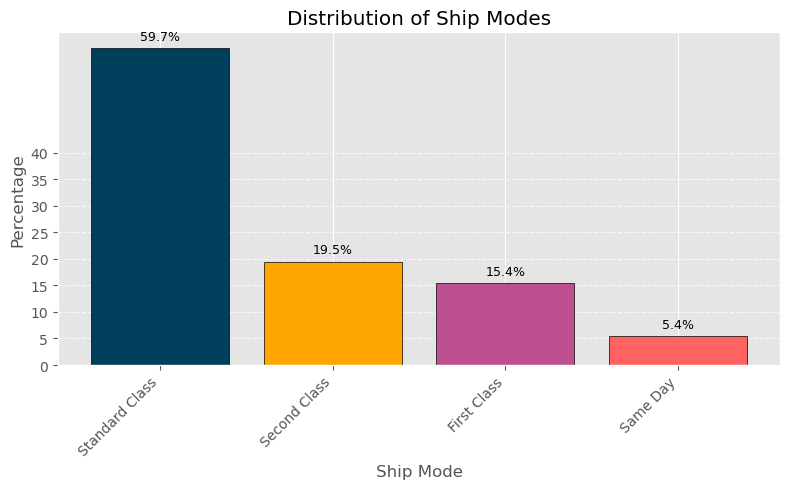

In [95]:
plt.figure(figsize=(8, 5))
colors = ['#003f5c', '#ffa600', '#bc5090', '#ff6361']
plt.bar(i3.index, i3.values, color=colors, edgecolor='black')
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 41, 5))
for i, v in enumerate(i3.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Of all orders processed, the majority, accounting for 60%, were shipped using standard class delivery, typically taking around 5 days for fulfillment. Meanwhile, 20% of orders utilized second-class shipping, with an average fulfillment period of 3 days. Approximately 15% of orders opted for first-class shipping, which typically resulted in fulfillment within 2 days. A smaller portion, about 5% of all orders, were expedited through same-day delivery.

In [91]:
print('Following are the average order fulfillment time for corresponding ship modes:')

print("Standard Class:",data[data['Ship Mode'] == 'Standard Class']['order_fulfillment_time'].mean())
print("Second Class:",data[data['Ship Mode'] == 'Second Class']['order_fulfillment_time'].mean())
print("First Class:",data[data['Ship Mode'] == 'First Class']['order_fulfillment_time'].mean())

Following are the average order fulfillment time for corresponding ship modes:
Standard Class: 5 days 00:10:22.520107238
Second Class: 3 days 05:45:44.884318766
First Class: 2 days 04:22:09.518855656


In [92]:
print('Annual Average Transaction Value (nominal):')

av_tv=pd.DataFrame(data.groupby('year')['Sales'].sum() / data['Order ID'].nunique())
av_tv['change'] = av_tv['Sales'].pct_change() * 100
av_tv

Annual Average Transaction Value (nominal):


,Sales,change
year,,
2011,96.6755,NaN
2012,93.9374,-2.8322
2013,121.4761,29.3160
2014,146.5257,20.6210


The average transaction value measures how much on average customers spend each time they make a purchase. On the table above, customers had been spending more on each transaction annualy. It can be seen, however, that customers had spent less in 2012 than in the previous year, 2011. It then grew 29% in 2013, and 20% in 2014. Take note that the true change in the average transaction value can only be known after accounting for factors such as inflation. The figure above is just an rough estimate

In [93]:
print('Annual Discounted Sales')
pd.DataFrame(data.groupby('year')['discounted_sales'].sum())

Annual Discounted Sales


,discounted_sales
year,
2011,406690.7027
2012,407671.3237
2013,527707.8887
2014,632548.8109


Discounted sales measure the actual revenue that the company receives from its customers after accounting for discounts.

In [94]:
profit_met=pd.DataFrame(data.groupby('year')[['net_profit','Sales']].sum())
profit_met['net_profit_margin'] = (profit_met['net_profit'] / profit_met['Sales']) * 100
profit_met

,net_profit,Sales,net_profit_margin
year,,,
2011,49543.9741,484247.4981,10.2311
2012,61618.6037,470532.5090,13.0955
2013,81726.9308,608473.8300,13.4315
2014,93507.5131,733947.0232,12.7404


Net profit margin represents the overall profitability of the company after accountign for all expenses.

# Conclusion

The company experienced a fluctuating trajectory in sales over the years, with notable peaks in 2013 and sluggish growth in 2012. Seasonal patterns underscored spikes in November, December, and September, while March saw erratic sales patterns. Phones, chairs, and storage items dominated their respective categories, whereas copiers, furnishings, and fasteners struggled to keep pace.

Regional analysis revealed the West and East consistently outperforming in sales across most product categories, with the South lagging behind consistently. Surprisingly, the Central region showed positive growth in 2012, contrary to other regions. The West emerged as the frontrunner with the swiftest average annual sales surge.

Profitability exhibited volatility, yet the company managed to uphold a 10%+ profit margin from 2011 to 2014. Chairs, phones, and storage units emerged as the least profitable, whereas furnishings, copiers, and labels proved to be lucrative subcategories. Profit margins took a hit due to sales discounts, with tables and office supplies bearing the brunt of the impact.

In essence, while the company witnessed sales expansion and sustained profitability, its performance was significantly influenced by seasonal fluctuations, regional disparities, and the impact of discounts on profit margins.





